# 中山芝1600m

In [54]:
%run 0.2_Function.ipynb

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
# 日本語フォントの設定
plt.rcParams["font.family"] = "Ricty Diminished"

In [57]:
location = "中"
distance = 1600

In [58]:
# 2005-2025 中山
df = result_df("成績", "2015", "2025", [location])

In [59]:
# 1600m、 芝、馬券内、良馬場に限定
distance_c = df["距離"] == distance
ground_type_c = df["芝・ダ"] == "芝"
except_c = df['異常コード'] == 0
arrival_c = df["確定着順"] <= 3
baba_c = df['馬場状態'] == "良"
cond = distance_c & ground_type_c & except_c & baba_c & arrival_c
df = df[cond]

In [60]:
# この条件で行われる重賞レース
df[df['クラスコード'] >=163]['レース名'].unique()

array(['ダービーＨG3', 'ニュージG2', 'フェアリG3', 'オータムＨG3', 'ターコイＨG3'], dtype=object)

In [61]:
# 走破タイムTOP10
df[
    [
        "レース日",
        "回次",
        "日次",
        "レース名",
        "馬名",
        "走破タイム",
        "上がり3Fタイム",
        "PCI",
        "年齢",
        "斤量",
        "騎手名",
        "単勝オッズ",
    ]
].sort_values("走破タイム").head(10)

,レース日,回次,日次,レース名,馬名,走破タイム,上がり3Fタイム,PCI,年齢,斤量,騎手名,単勝オッズ
4699,2019-09-08,4,2,オータムＨG3,トロワゼトワル,90.3,34.9,45.2,4,52.0,横山典弘,7.2
9005,2024-09-08,4,2,オータムＨG3,アスコリピチェーノ,90.8,32.7,56.6,3,55.5,ルメール,1.5
4700,2019-09-08,4,2,オータムＨG3,ディメンシオン,90.9,34.2,49.5,5,53.0,北村宏司,9.4
4691,2019-09-08,4,2,オータムＨG3,ジャンダルム,90.9,34.2,49.5,4,55.0,藤井勘一,28.2
9010,2024-09-08,4,2,オータムＨG3,タイムトゥヘヴン,91.0,32.4,58.5,6,56.0,柴田善臣,161.8
9003,2024-09-08,4,2,オータムＨG3,サンライズロナウド,91.0,33.4,53.5,5,56.0,横山典弘,10.7
71987,2017-09-10,4,2,オータムＨG3,グランシルク,91.6,33.4,54.6,5,56.0,田辺裕信,3.0
48947,2023-09-10,4,2,オータムＨG3,ソウルラッシュ,91.6,33.6,53.6,5,59.0,松山弘平,3.7
48955,2023-09-10,4,2,オータムＨG3,ウイングレイテスト,91.6,33.9,52.1,6,57.0,松岡正海,11.1
46395,2019-03-30,3,3,ダービーＨG3,フィアーノロマーノ,91.7,34.8,48.1,5,55.0,川田将雅,6.0


In [ ]:
明かにハンデで斤量が軽い馬を除くと、

- アスコリピチェーノ
- ジャンダルム
- ソウルラッシュ

をはじめ重賞馬が上位

In [62]:
print("サンプル数は" + str(len(df)))

サンプル数は1605


In [64]:
class_code_labels = {
    7: "新馬、未勝利",
    11: "新馬、未勝利",
    15: "新馬、未勝利",
    19: "1-3勝クラス",
    23: "1-3勝クラス",
    39: "1-3勝クラス",
    43: "1-3勝クラス",
    63: "1-3勝クラス",
    67: "1-3勝クラス",
    115: "OP以上",
    131: "OP以上",
    147: "OP以上",
    163: "OP以上",
    179: "OP以上",
    195: "OP以上",
}

df["クラス分類"] = df["クラスコード"].map(class_code_labels)

<Axes: xlabel='クラス分類', ylabel='走破タイム'>

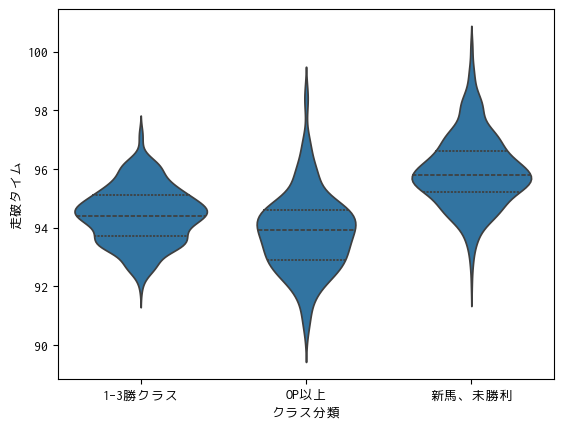

In [65]:
sns.violinplot(
    data=df,
    x="クラス分類",
    y="走破タイム",
    inner="quartile"
)

<Axes: xlabel='クラス分類', ylabel='上がり3Fタイム'>

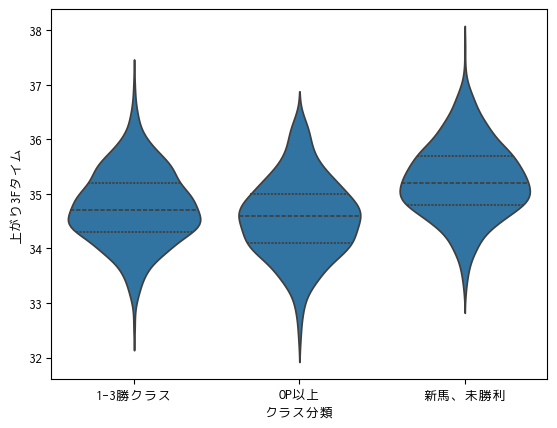

In [24]:
sns.violinplot(
    data=df,
    x="クラス分類",
    y="上がり3Fタイム",
    inner="quartile"
)

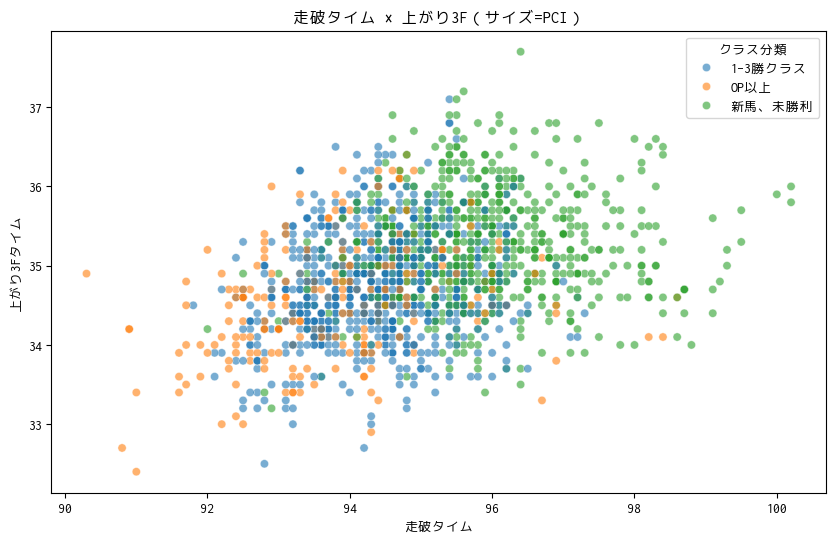

In [23]:

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x="走破タイム",
    y="上がり3Fタイム",
    hue="クラス分類",
    sizes=(3, 20),
    alpha=0.6
)
plt.title("走破タイム × 上がり3F")
plt.show()

ざっくりとした傾向だが、

i.32秒台かつ上がり33秒台であれば相対的にハイレベルと言えるか

<Axes: xlabel='クラス分類', ylabel='PCI'>

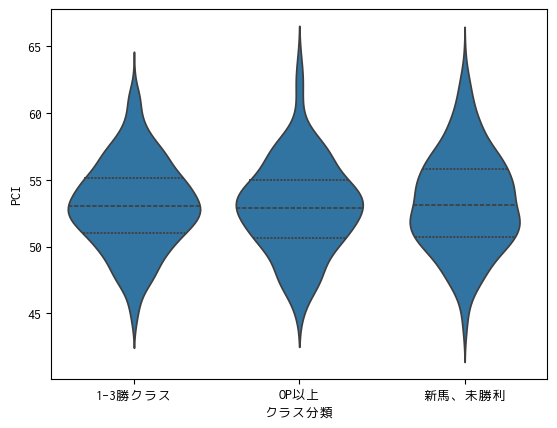

In [34]:
sns.violinplot(
    data=df,
    x="クラス分類",
    y="PCI",
    inner="quartile"
)

- PCIを見てみると、傾向としてどのクラスでもスローからの瞬発力勝負になり易い
- コース形態的に、スタートから下り坂、最初のコーナーまで短かく外枠不利なので、序盤にペースが上がりづらいことが影響していると考えられる